<a href="https://colab.research.google.com/github/chloebh9/Doit_data_analysis/blob/main/Do_it_9_%ED%95%9C%EA%B5%AD%EC%9D%B8%EC%9D%98_%EC%82%B6_%ED%8C%8C%EC%95%85%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/doit_data_analysis

/content/drive/MyDrive/Colab Notebooks/doit_data_analysis


In [3]:
!pip install pyreadstat

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()

In [6]:
welfare
welfare.shape
welfare.info()
welfare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [7]:
welfare = welfare.rename(
    columns = {'h14_g3'     : 'sex',
               'h14_g4'     : 'birth',
               'h14_g10'    : 'marriage_type',
               'h14_g11'    : 'religion',
               'p1402_8aq1' : 'income',
               'h14_eco9'   : 'code_job',
               'h14_reg7'   : 'code_region'}
)

## 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

In [8]:
welfare['sex'].dtypes

dtype('float64')

In [9]:
#이상치 확인
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [10]:
welfare['sex'] = np.where(welfare['sex']==1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

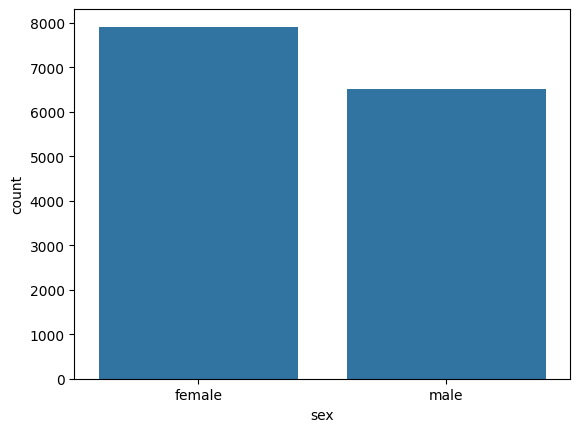

In [11]:
sns.countplot(data=welfare, x = 'sex')

In [12]:
welfare['income'].dtypes

dtype('float64')

In [13]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

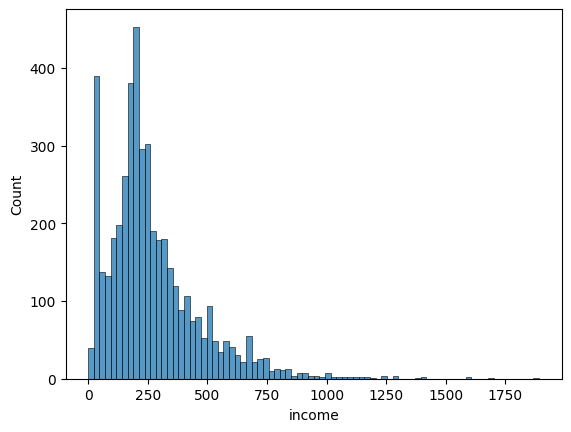

In [14]:
sns.histplot(data = welfare, x='income')

In [15]:
welfare['income'].describe() #이상치 확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [16]:
welfare['income'].isna().sum() # 결측치 확인

9884

In [17]:
sex_income = welfare.dropna(subset=['income'])  \
                    .groupby('sex', as_index = False)   \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

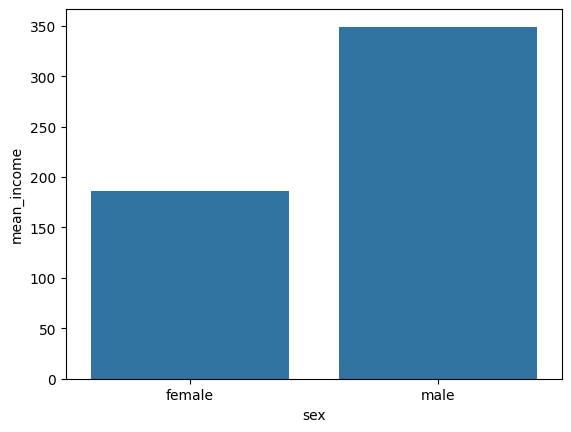

In [18]:
sns.barplot(data = sex_income, x='sex', y='mean_income')

## 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

In [19]:
welfare['birth'].dtypes

dtype('float64')

In [20]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [21]:
welfare['birth'].isna().sum() #결측치 확인

0

In [22]:
# 만약 결측치가 있을 경우
welfare['birth'] = np.where(welfare['birth']==9999, np.nan, welfare['birth'])

In [23]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1 )    # 나이 변수 만들기
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

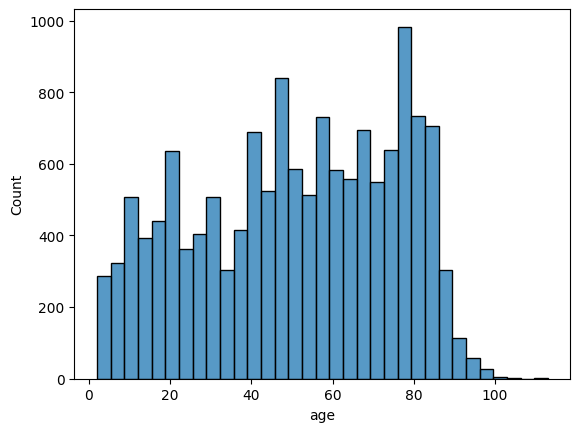

In [24]:
sns.histplot(data = welfare, x = 'age')

In [25]:
age_income = welfare.dropna(subset =['income'])\
                    .groupby('age')         \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

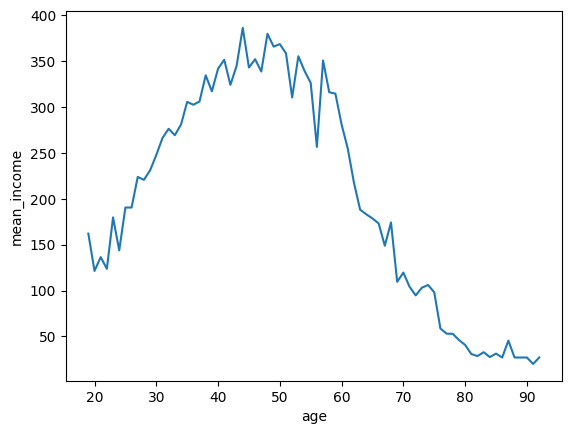

In [26]:
sns.lineplot(data = age_income, x ='age', y='mean_income')

## 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

In [27]:
welfare = welfare.assign(ageg = np.where(welfare['age']<30, 'young',
                                np.where(welfare['age']<=59, 'middle',
                                                            'old')))
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

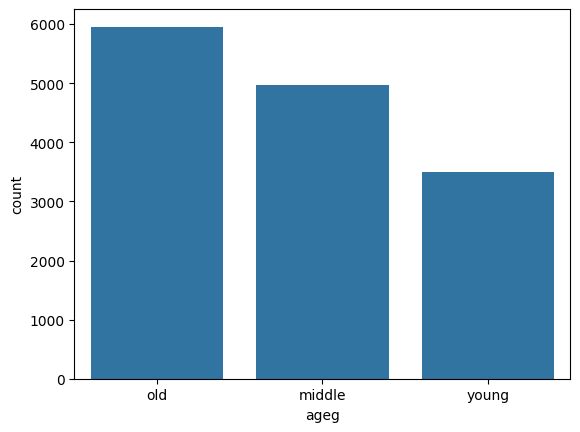

In [28]:
sns.countplot(data = welfare, x='ageg')

In [29]:
ageg_income = welfare.dropna(subset = ['income'])\
                     .groupby('ageg', as_index = False)\
                     .agg(mean_income = ('income', 'mean'))

<Axes: xlabel='ageg', ylabel='mean_income'>

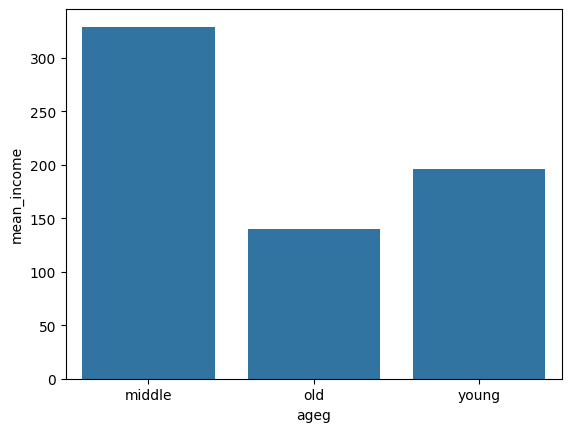

In [30]:
sns.barplot( data = ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

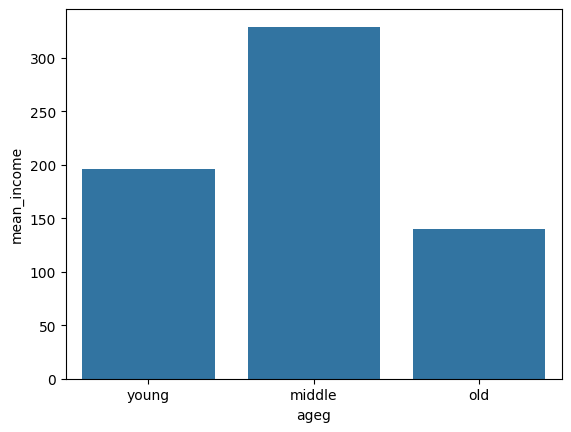

In [31]:
# 막대 정렬하기
sns.barplot(data = ageg_income, x = 'ageg', y ='mean_income', order = ['young', 'middle', 'old'])

## 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

In [32]:
sex_income = \
    welfare.dropna(subset = ['income'])\
           .groupby(['ageg','sex'], as_index = False)\
           .agg(mean_income = ('income', 'mean'))

In [33]:
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

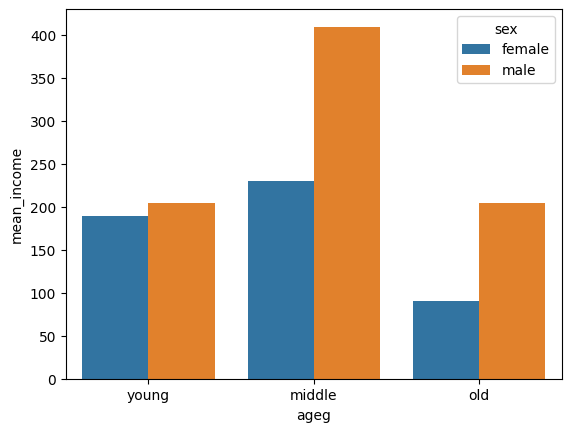

In [34]:
sns.barplot(data = sex_income, x='ageg', y ='mean_income', hue = 'sex', order = ['young', 'middle', 'old'])

In [35]:
# 나이 및 성별 월급 평균표 만들기
sex_age = welfare.dropna(subset = ['income'])\
                 .groupby(['age', 'sex'], as_index = False)\
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<Axes: xlabel='age', ylabel='mean_income'>

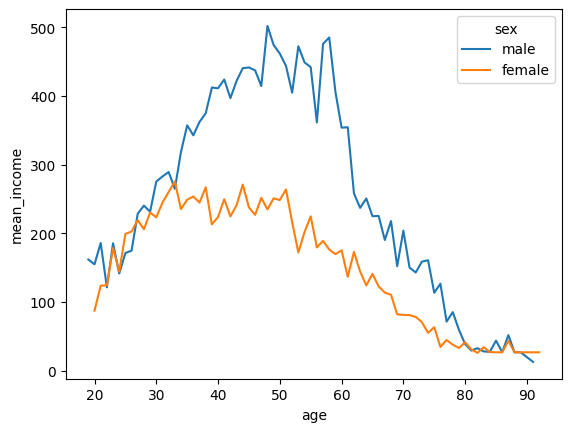

In [36]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

## 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

In [37]:
welfare['code_job'].dtypes  # 변수 타입 출력

dtype('float64')

In [38]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [39]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [40]:
list_job.shape

(156, 2)

In [41]:
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [42]:
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [43]:
job_income = welfare.dropna(subset = ['job', 'income'])\
                    .groupby('job')\
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,mean_income
job,
가사 및 육아 도우미,92.455882
간호사,265.219178
감정∙기술영업및중개관련종사자,391.000000
건물 관리원 및 검표원,168.375000
건설 및 광업 단순 종사자,261.975000


In [44]:
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,mean_income
job,
의료 진료 전문가,781.000000
법률 전문가,776.333333
행정 및 경영 지원 관리자,771.833333
보험 및 금융 관리자,734.750000
재활용 처리 및 소각로 조작원,688.000000
컴퓨터 하드웨어 및 통신공학 전문가,679.444444
기계∙로봇공학 기술자 및 시험원,669.166667
건설∙전기 및 생산 관련 관리자,603.083333
제관원 및 판금원,597.000000


In [45]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [46]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

<Axes: xlabel='mean_income', ylabel='job'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


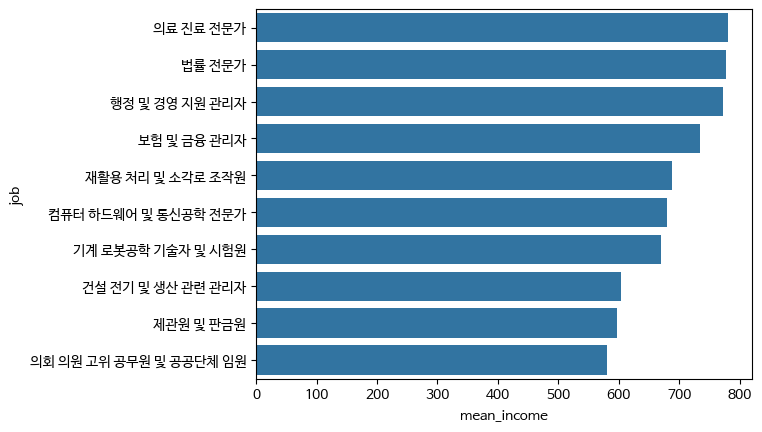

In [47]:
sns.barplot(data = top10, x = 'mean_income', y = 'job')

In [48]:
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,mean_income
job,
기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
기타 서비스 관련 단순 종사자,77.789474
청소원 및 환경미화원,88.461756
가사 및 육아 도우미,92.455882
돌봄 및 보건 서비스 종사자,117.162338
음식 관련 단순 종사자,118.187500
농림∙어업 관련 단순 종사자,122.625000
학예사∙사서 및 기록물 관리사,140.000000
채굴 및 토목 관련 기능 종사자,140.000000


[(0.0, 800.0)]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


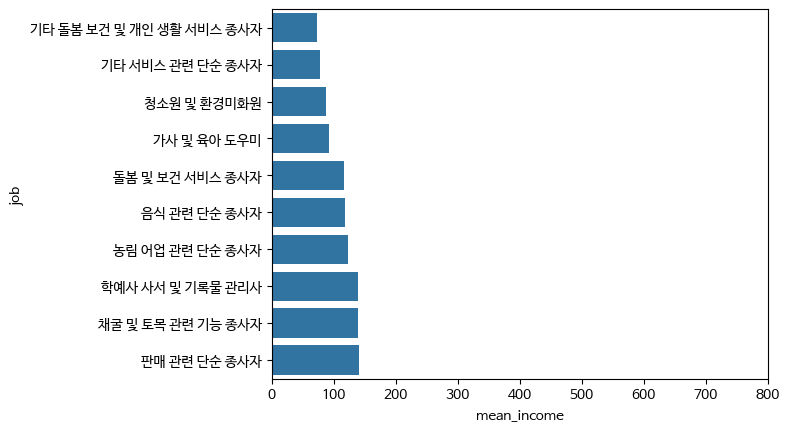

In [49]:
sns.barplot(data = bottom10, y = 'job', x = 'mean_income')\
   .set(xlim = [0,800]) # 위의 월급 상위 10위 그래프와 비교하기위해 x축 0~800으로 설정

## 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?

In [51]:
job_male = welfare.dropna(subset = ['sex', 'job'])\
                  .query('sex == "male"')\
                  .groupby('job', as_index = False)\
                  .agg(n = ('job', 'count'))\
                  .sort_values('n', ascending = False)\
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [53]:
job_female = welfare.dropna(subset = ['sex', 'job'])\
                  .query('sex == "female"')\
                  .groupby('job', as_index = False)\
                  .agg(n = ('job', 'count'))\
                  .sort_values('n', ascending = False)\
                  .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

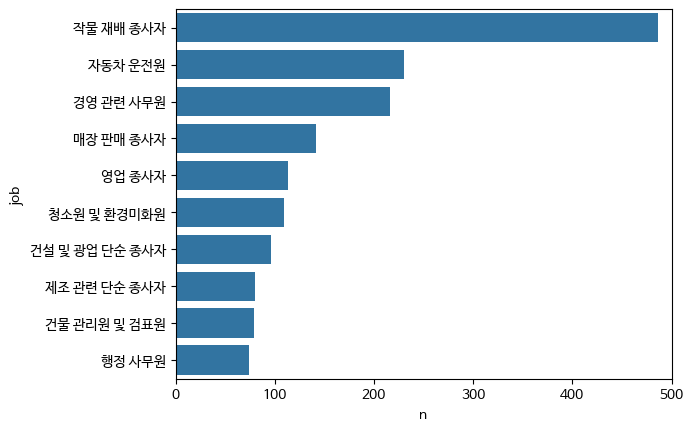

In [54]:
sns.barplot(data = job_male, y = "job", x = 'n').set(xlim = [0, 500])

[(0.0, 500.0)]

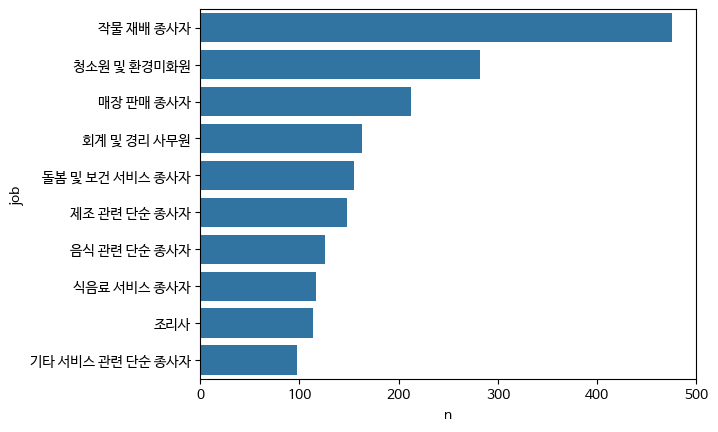

In [55]:
sns.barplot(data = job_female, y = "job", x = 'n').set(xlim = [0, 500])

## 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?

In [56]:
welfare['religion'].dtypes  #변수 타입 출력

dtype('float64')

In [57]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [58]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

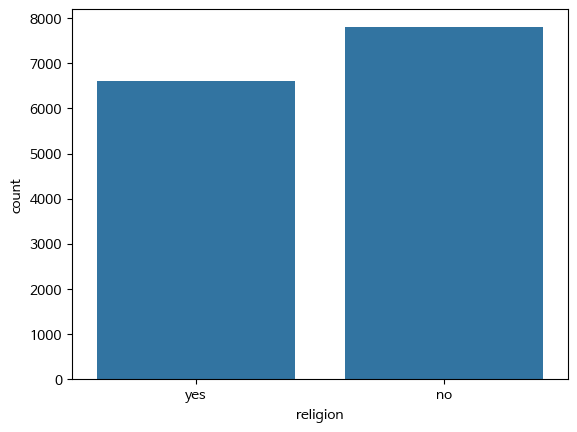

In [59]:
sns.countplot(data = welfare, x = 'religion')

In [60]:
welfare['marriage_type'].dtypes

dtype('float64')

In [61]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [62]:
welfare['marriage'] = np.where(welfare['marriage_type']==1, 'marriage',
                      np.where(welfare['marriage_type']==3, 'divorce',
                                                            'etc'))

In [63]:
n_divorce = welfare.groupby('marriage', as_index = False)\
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

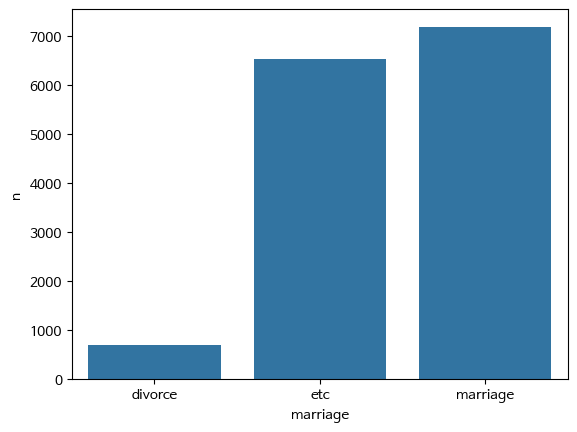

In [64]:
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

In [68]:
rel_div = welfare.query('marriage != "etc"')\
                 .groupby('religion', as_index = False)\
                 ['marriage']\
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [69]:
rel_div = rel_div.query('marriage == "divorce"')\
                 .assign(proportion = rel_div['proportion'] * 100)\
                 .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

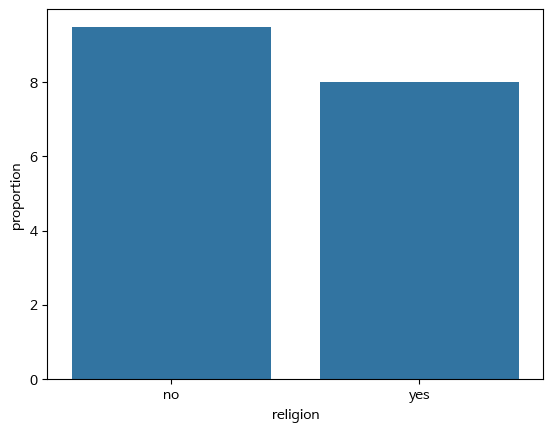

In [70]:
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')

In [73]:
age_div = welfare.query('marriage != "etc"')\
                 .groupby('ageg', as_index = False)\
                 ['marriage']\
                 .value_counts(normalize = True)    # 비율 구하기
age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [74]:
welfare.query('marriage != "etc"')\
       .groupby('ageg', as_index = False)\
       ['marriage']\
       .value_counts()          # 빈도 구하기

,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


In [76]:
# 초년 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"')\
                 .assign(proportion = age_div['proportion']*100)\
                 .round(1)

<Axes: xlabel='ageg', ylabel='proportion'>

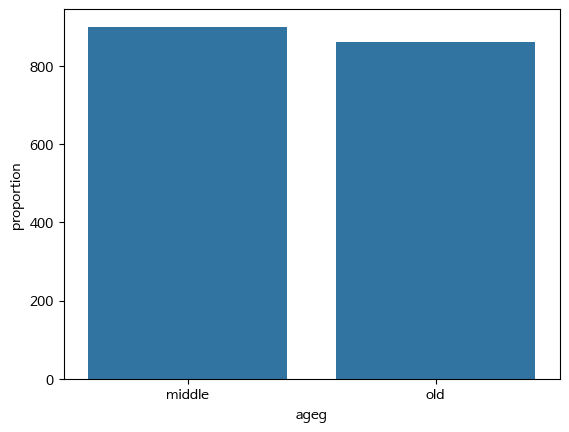

In [77]:
sns.barplot(data = age_div, x = 'ageg', y='proportion')

In [80]:
# 연령대 및 종교 유무에 따른 이혼율표 만들기
# etc 제외, 초년 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"')\
                     .groupby(['ageg', 'religion'], as_index = False)\
                     ['marriage']\
                     .value_counts(normalize = True)
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


In [81]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = \
    age_rel_div.query('marriage == "divorce"')\
               .assign(proportion = age_rel_div['proportion']*100)\
               .round(1)

<Axes: xlabel='ageg', ylabel='proportion'>

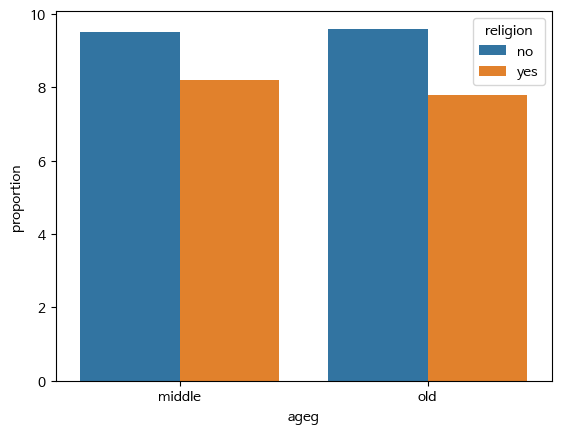

In [86]:
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')